### Criar Modelos de  Machine Learning com Scikit Learn

##### Lista extra - horas de estudo 

###### Importar bibliotecas 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

##### Carregar arquivo horas de estudo 

In [2]:

dados = pd.read_csv ("C:\\Users\\FIC\\Documents\\fundamentos-datapython-erika\\Arquivos\\horasDeEstudo.csv")

##### Visualizar algumas informações básicas do dataframe

In [3]:
dados.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [4]:
dados.tail()

,horas_estudo_mes,salario
495,58.0,6259.0
496,34.0,6099.0
497,47.0,6170.0
498,37.0,5064.0
499,29.0,5236.0


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


##### Gerar uma análise exploratória dos dados
a. Verificar se há dados nulos e mostrar a quantidade;

b. Resumo estatístico do dataframe;

c. Estudo estatístico das variáveis preditoras (X);

d. Analisar a correlação entre as variáveis;

e. Crie os gráficos de dispersão, jointplot e pairplot para demonstrar a correlação entre as variáveis;

f. Analisar a distribuição das informações da variável preditora (X) com um histograma.


In [6]:
# a) Não há dados nulos ou faltantes
dados.isnull().sum()

# calcula a quantidade de informações nulas isnull e com a função .sum 



horas_estudo_mes    0
salario             0
dtype: int64

In [7]:
# b. Resumo estatístico do dataframe;

dados.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [8]:
# d.Analisar a correlação entre as variaveis 
dados.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


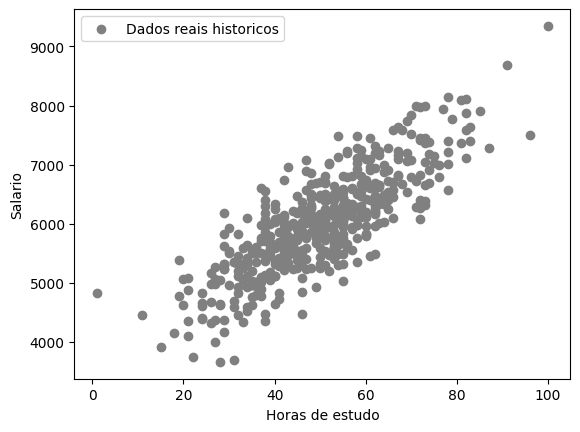

In [10]:
# e. Crie os gráficos de dispersão, jointplot e pairplot para demonstrar a correlação entre as variáveis;

plt.scatter(data=dados, x='horas_estudo_mes', y='salario', label= 'Dados reais historicos', color= 'gray')

plt.xlabel('Horas de estudo')
plt.ylabel('Salario')
plt.legend()

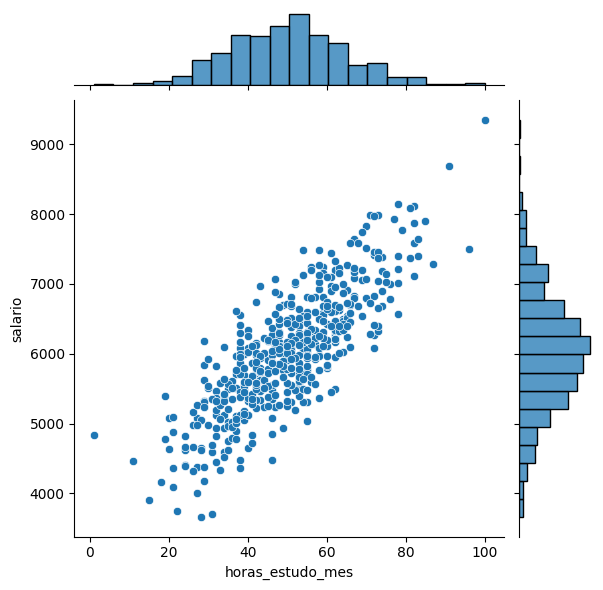

In [12]:
sns.jointplot (data=dados, x='horas_estudo_mes', y='salario')

<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

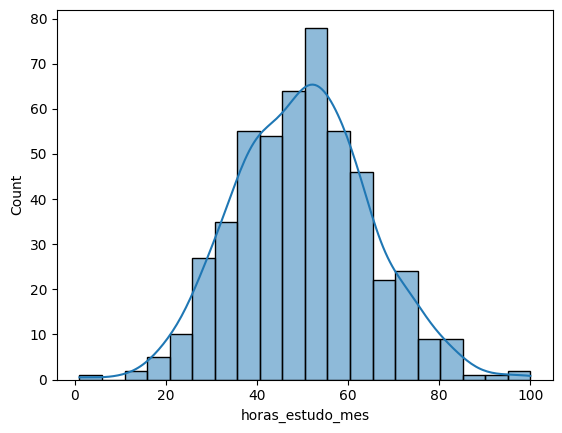

In [11]:
# Construir um histograma para analisar o comportamento da variavel preditora (x)

sns.histplot(data=dados, # conjunto de dados
              x='horas_estudo_mes', # varivel
              kde=True # Curva de distribuição (densidade)
              ) 

##### 5. Preparação dos dados:
a. Preparar a variável de entrada (X), convertendo-a em um array. Utilize a função np.array.

b. Verifique o tipo de informação, utilizando a função type;

c. Ajuste o formato da matrix, transformando cada dado em uma matriz 1x1. Utilize o comando X.reshape(-1,1);

d. Crie uma variável chamada y e atribua a ela a coluna salário do dataframe.


In [17]:
# Separar as variaveis

x = dados['horas_estudo_mes']
y = dados['salario']

# Verificar o tipo de dado e qtde de elementos

print(f'O tipo de dado da variavel X é {type(x)}')
print(f'A quantidade de dados da variavel X é {len(x)}')
print(f'O tipo de dado da variavel y é {type(y)}')
print(f'A quantidade de dados da variavel y é {len(y)}')




O tipo de dado da variavel X é <class 'pandas.core.series.Series'>
A quantidade de dados da variavel X é 500
O tipo de dado da variavel y é <class 'pandas.core.series.Series'>
A quantidade de dados da variavel y é 500


In [19]:
# Converter para array ( matriz 1x1 )
x=np.array(x)

x=x.reshape(-1,1) # primeiro numero é linhas e o segundo colunas

print(f'O tipo de dado da variavel X é {type(x)}')

O tipo de dado da variavel X é <class 'numpy.ndarray'>


### 6. Separação dos dados em treino e teste:
a. Separe os dados em treino e teste, utilizando o comando train_teste_split. Adote como tamanho da amostra de TESTE como sendo 20% e Random_state igual a 42;

b. Analise o tamanho das variáveis de treino e teste.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2 # tamanho do teste
                                                    ,random_state=42) # qtde de subgrupos do teste
print('Quantidade de elementos para treino',len(X_train))
print('Quantidade de elementos para teste',len(X_test))
print('Quantidade de elementos para total',len(x))

Quantidade de elementos para treino 400
Quantidade de elementos para teste 100
Quantidade de elementos para total 500


#### 7. Treinamento do modelo:
a. Crie o modelo de regressão linear simples. modelo = LinearRegression ();

b. Treino o modelo com as variáveis X_train e y_train. modelo.fit(X_train, y_train);

c. Visualize a reta de regressão linear (previsões) e os dados reais utilizados no treinamento. Utilize os comandos abaixo

In [27]:
# Inicializar o algoritmo para treino

modelo = LinearRegression ()

# para treinar o modelo 

modelo.fit(X_train,y_train)

LinearRegression()

In [30]:
# exibir os coeficientes

print('coeficiente angular (a)',modelo.coef_)
print('coeficiente linear (b)',modelo.intercept_)

coeficiente angular (a) [48.18185277]
coeficiente linear (b) 3596.783724372753


#### deploy do modelo 

In [32]:
# Inserir os valores para previsão 

horasEstudo = np.array([[50]])

# Realizar a previsão

salario = modelo.predict(horasEstudo)

# resultado 

print(f"Para {horasEstudo} horas aplicadas ao estudo" + f" tem uma probabilidade de se obter um salário de aproximadamente de {salario}")

Para [[50]] horas aplicadas ao estudo tem uma probabilidade de se obter um salário de aproximadamente de [6005.87636294]


In [33]:
# Inserir os valores para previsão 

horasEstudo = np.array([[48]])

# Realizar a previsão

salario = modelo.predict(horasEstudo)

# resultado 

print(f"Para {horasEstudo} horas aplicadas ao estudo" + f" tem uma probabilidade de se obter um salário de aproximadamente de {salario}")

Para [[48]] horas aplicadas ao estudo tem uma probabilidade de se obter um salário de aproximadamente de [5909.5126574]


In [34]:
# Inserir os valores para previsão 

horasEstudo = np.array([[65]])

# Realizar a previsão

salario = modelo.predict(horasEstudo)

# resultado 

print(f"Para {horasEstudo} horas aplicadas ao estudo" + f" tem uma probabilidade de se obter um salário de aproximadamente de {salario}")

Para [[65]] horas aplicadas ao estudo tem uma probabilidade de se obter um salário de aproximadamente de [6728.60415452]


In [35]:
# Inserir os valores para previsão 

horasEstudo = np.array([[73]])

# Realizar a previsão

salario = modelo.predict(horasEstudo)

# resultado 

print(f"Para {horasEstudo} horas aplicadas ao estudo" + f" tem uma probabilidade de se obter um salário de aproximadamente de {salario}")

Para [[73]] horas aplicadas ao estudo tem uma probabilidade de se obter um salário de aproximadamente de [7114.05897669]


In [45]:
# Inserir os valores para previsão 
entrada= int(input('digite o primeiro valor'))
horasEstudo = np.array([[entrada]])

# Realizar a previsão

salario = modelo.predict(horasEstudo)

# resultado 

print(f"Para {horasEstudo[0][0]} horas aplicadas ao estudo" + f" tem uma probabilidade de se obter um salário de aproximadamente de R${round(salario[0],2)}")

Para 96 horas aplicadas ao estudo tem uma probabilidade de se obter um salário de aproximadamente de R$8222.24
